# PELT integration test

Test the penalized exact linear time method for inferring changepoints. This is based on a PELT variant in which we minimize a cost function based on a KL divergence between the observed data distribution and a Bernoulli posterior for the latent state with piecewise-constant probability $p$.

## Load data

In [1]:
using HDF5

fid = h5open("data/basic_poisson_test.jld", "r")
λ = read(fid["base_rate"])
ν = read(fid["rate_gain"])
counts = read(fid["counts"])
states = read(fid["states"]);

## Plot data

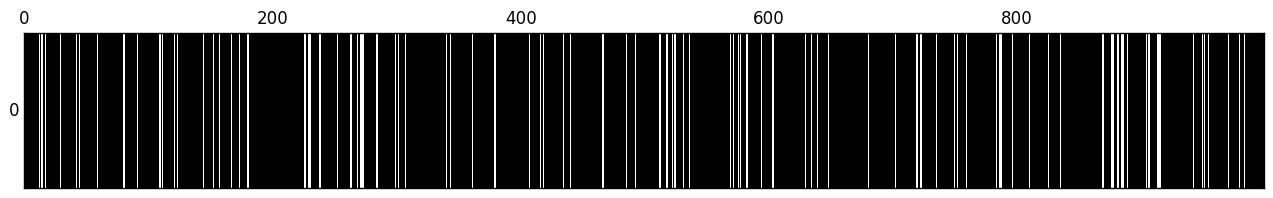

In [2]:
using PyPlot

matshow(counts', cmap="gray", aspect="auto", clim=(0, 1));

# Define some useful functions

In [3]:
function κ(N::Int64, ℓ::Int64)
    (N * log(ν) - λ * (ν - 1) * ℓ)::Float64
end

κ (generic function with 1 method)

In [4]:
function L(N::Int64, ℓ::Int64)
    kap = κ(N, ℓ)
    kap + log1p(exp(-kap))
end

L (generic function with 1 method)

In [5]:
function C(N::Int64, ℓ::Int64)
    kap = κ(N, ℓ)
    -kap / (1 + exp(-kap))
end

C (generic function with 1 method)

# Run inference

In [6]:
T = length(counts)  # number of time points
F = Array{Float64}(T + 1)  # F(t) = minimum cost for all data up to time t
R = Set{Int64}()  # set of times over which to search
CP = Set{Int64}()  # list of changepoints (ordered)

Set{Int64}()

Now, initialize $F(0)$ and $R$:

In [7]:
push!(R, 0)
F[1] = 0

0